C:\Users\Habram\AppData\Local\Temp\ipykernel_2628\97451016.py:100: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  curr_width, curr_height = self.draw.textsize('EUR', font=self.font)
C:\Users\Habram\AppData\Local\Temp\ipykernel_2628\97451016.py:100: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  curr_width, curr_height = self.draw.textsize('EUR', font=self.font)
C:\Users\Habram\AppData\Local\Temp\ipykernel_2628\97451016.py:100: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  curr_width, curr_height = self.draw.textsize('EUR', font=self.font)
C:\Users\Habram\AppData\Local\Temp\ipykernel_2628\97451016.py:100: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  curr_width, curr

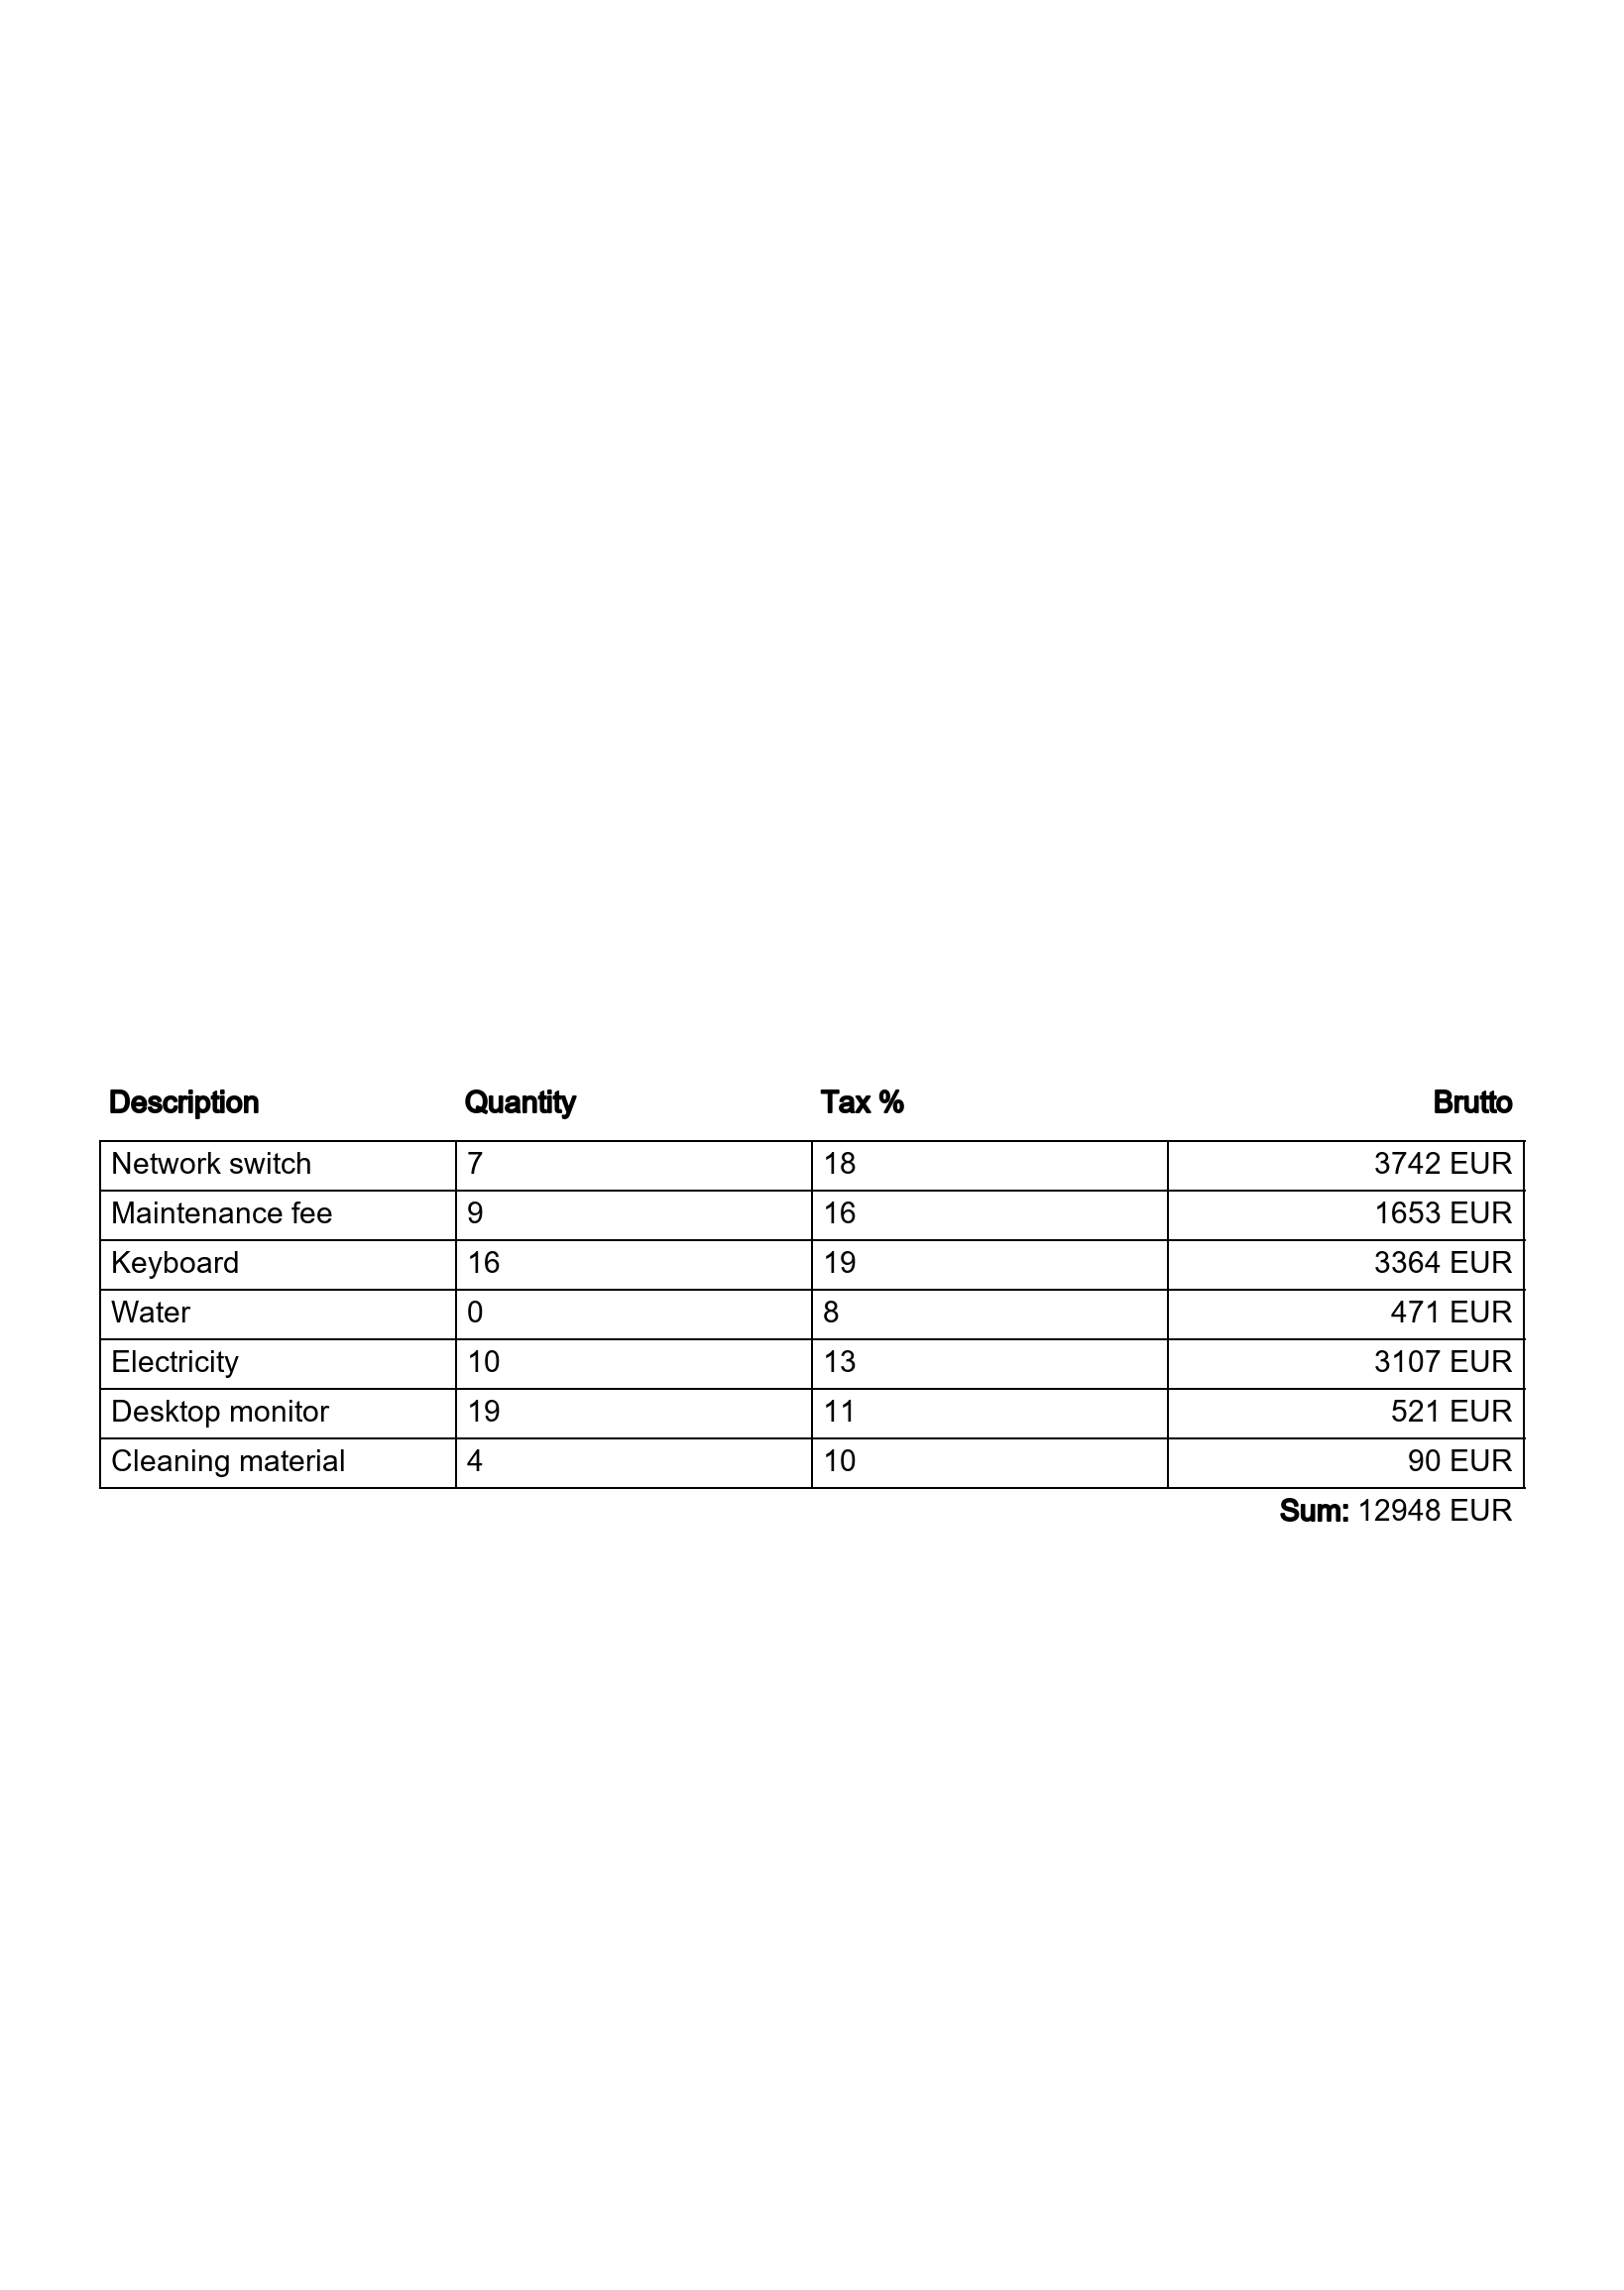

In [85]:
from PIL import Image, ImageDraw, ImageFont
from faker import Faker
import random

class Draw_Table():
    def __init__(self) -> None:
        # Possible column names
        self.column_names = ['Description', 'Quantity', 'Tax %', 'Netto', 'Brutto']
        # List of possible items in the table
        self.items = [
            'Electricity',
            'Water',
            'Gas',
            'Printer',
            'Maintenance fee',
            'Desktop monitor',
            'Designing cost',
            'Office chair',
            'Cell phone',
            'Laptop',
            'Network access point',
            'Network switch',
            'Professional beamer',
            'Smart white board',
            'Thermostat',
            'Office plants',
            'Professional software',
            'Printer ink',
            'Cleaning material',
            'Keyboard',
            'Network cable',
            'Security camera',
            'Carpet',
            'Washing machine',
            'Kitchen sink',
            'Garbage can'
        ]

    def __call__(self, img, bbox):
        self.img = img
        self.draw = ImageDraw.Draw(self.img)
        self.font = ImageFont.truetype("arial.ttf", 30)
        self.bbox = bbox                            # Bounding box of the table [x1, y1, x2, y2]
        self.num_items = random.randint(3, 10)      # How many rows does the table have (number of items)
        self.num_cols = random.randint(2, 5)        # How many columns does the table have
        self.increment = 50                         # Height of a row in pixels
        self.margin = 12                            # Distance between 

        self.draw_horizontal_lines()
        self.draw_vertical_lines()
        self.draw_header()
        self.draw_content()

        display(self.img)
        # self.img.show()

    def get_x_positions(self):
        # Width of the table x2 - x1
        full_width = self.bbox[2] - self.bbox[0]
        col_width = int(full_width / self.num_cols)
        # X coordinate of the beginning of a column
        col_positions = []
        # The table has an offset, add this offset to the columns too
        pos = self.bbox[0]

        for _ in range(self.num_cols):
            col_positions.append(pos)
            pos += col_width
        col_positions.append(pos)

        return col_positions

    def draw_horizontal_lines(self):
        left_x = self.bbox[0]
        left_y = self.bbox[1]
        right_x = self.bbox[2]
        right_y = self.bbox[1]

        for _ in range(self.num_items):
            left_y += self.increment
            right_y += self.increment
            self.draw.line([(left_x, left_y), (right_x, right_y)], fill ="black", width = 2)

    def draw_vertical_lines(self):
        top_y = self.bbox[1] + self.increment
        bot_y = self.bbox[1] + (self.increment * self.num_items)

        positions = self.get_x_positions()

        self.draw.line([(self.bbox[0], top_y), (self.bbox[0], bot_y)], fill ="black", width = 2)
        for pos_x in positions:
            self.draw.line([(pos_x, top_y), (pos_x, bot_y)], fill ="black", width = 2)

    def draw_brutto(self, bruttos):
        for row in range(self.num_items - 1): 
            y = self.bbox[1] + row * self.increment + self.increment + self.margin
            # Draw the currency
            self.draw.text((self.bbox[2] - self.margin, y), 'EUR', fill='black', font=self.font, anchor='rt')
            # Get the width of the currency
            curr_width, curr_height = self.draw.textsize('EUR', font=self.font)
            # Draw the amount
            self.draw.text((self.bbox[2] - curr_width - 20, y), str(bruttos[row]), fill='black', font=self.font, anchor='rt')

    def draw_header(self):
        positions = self.get_x_positions()
        
        for col in range(self.num_cols - 1):
            self.draw.text((positions[col] + 10, self.bbox[1]), self.column_names[col], fill='black', font=self.font, anchor='lt', stroke_width=1)
        self.draw.text((positions[-1] - 10, self.bbox[1]), self.column_names[-1], fill='black', font=self.font, anchor='rt', stroke_width=1)

    def draw_content(self):
        descriptions = random.sample(self.items, self.num_items-1)
        quantities = random.sample(range(20), self.num_items-1)
        taxes = random.sample(range(5, 20), self.num_items-1)
        bruttos = random.sample(range(5000), self.num_items-1)
        nettos = [a-a*b*0.01 for a,b in zip(bruttos,taxes)]
        
        data = [descriptions, quantities, taxes, nettos]

        positions = self.get_x_positions()

        for row in range(self.num_items - 1):
            for col in range(self.num_cols - 1):
                self.draw.text((positions[col] + self.margin, self.bbox[1]+row*self.increment+self.increment+self.margin), str(data[col][row]), fill='black', font=self.font, anchor='lt')

        self.draw_brutto(bruttos)
        self.draw_sum_field(str(sum(bruttos)))

    def draw_sum_field(self, summa):
        x = self.bbox[2] - self.margin
        self.draw.text((x, self.bbox[1] + self.increment*self.num_items + self.margin), 'EUR', fill='black', font=self.font, anchor='rt')
        text_width, text_height = self.draw.textsize('EUR', font=self.font)
        self.draw.text((x - text_width - 8, self.bbox[1] + self.increment*self.num_items + self.margin), summa, fill='black', font=self.font, anchor='rt')
        text_width2, text_height = self.draw.textsize(summa, font=self.font)
        self.draw.text((x - text_width - text_width2 - 8, self.bbox[1] + self.increment*self.num_items + self.margin), 'Sum: ', fill='black', font=self.font, anchor='rt', stroke_width=1)
        

blank_dir = r'C:\Users\Habram\Documents\Datasets\fake-invoices\blank.tif'
blank = Image.open(blank_dir)
table_drawer = Draw_Table()
table_drawer(blank, [100, 1100, 1538, 2000])